## PA2: k-means clustering
cancer.csv data was lifted from van 't Veer LJ, et al. [Gene expression profiling predicts clinical outcome of breast cancer.](https://www.ncbi.nlm.nih.gov/pubmed/11823860) Nature. 2002

Assignment reference: [PA2 by Gina Sprint](https://github.com/gsprint23/cpts215/blob/master/progassignments/PA2.ipynb)

In [12]:
#from scipy import spatial
from math import sqrt

'''
# Comment block was used for testing
l = 6
o = 3
w = [3]

print("Euclidean: " + str(spatial.distance.euclidean(l,o,w)))
'''

class MyEuclidean:
    def get_max(self, u, v, w = None):
        maximum = len(u)
        if (len(v) > maximum):
            maximum = len(v)
        elif ((w is not None) and (len(w) > maximum)):
            maximum = len(w)
            
        return maximum
    
    def euclidean_sum(self, u, v, w = None):
        # Takes two vectors and find the sum
        sum_total = 0
        if(w == None): # If w is not provided, we assume it to be 1
            i = 0
            maximum = self.get_max(u,v)
            while (i < maximum):
                if(len(u) == 1 and len(v) == 1):
                    sum_total += (u[0]-v[0])*(u[0]-v[0])
                # u has one element, v is a vector
                elif(len(u) == 1):
                    sum_total += (u[0]-v[i])*(u[0]-v[i])
                # u is a vector and v has one element
                elif(len(v) == 1):
                    sum_total += (u[i]-v[0])*(u[i]-v[0])
                else:
                    sum_total += (u[i]-v[i])*(u[i]-v[i])
                i += 1
        else:
            i = 0
            maximum = self.get_max(u,v,w)
            while (i < maximum):
                # Case when w is 1, and u,v same dimensions
                if(len(w) == 1 and (len(u) == len(v))):
                    sum_total += w[0] * ((u[i]-v[i])*(u[i]-v[i]))
                # Case when u is 1, and w,v are same dimensions
                elif(len(u) == 1 and (len(w) == len(v))):
                    sum_total += w[i] * ((u[0]-v[i])*(u[0]-v[i]))
                # Case when v is 1, and u,w are same dimensions
                elif(len(v) == 1 and (len(u) == len(w))):
                    sum_total += w[i] * ((u[i]-v[0])*(u[i]-v[0]))
                # Case when w,u is 1, v is a vector
                elif(len(w) == 1 and len(u) == 1):
                    sum_total += w[0] * ((u[0]-v[i])*(u[0]-v[i]))
                # Case when v,w is 1, u is a vector
                elif(len(v) == 1 and len(w) == 1):
                    sum_total += w[0] * ((u[i]-v[0])*(u[i]-v[0]))
                # Case when u,v is 1, w is a vector
                elif(len(u) == 1 and len(v) == 1):
                    sum_total += w[i] * ((u[0]-v[0])*(u[0]-v[0]))
                # Case when u,v,w are all one
                elif(len(w) == 1 and len(u) == 1 and len(v) == 1):
                    sum_total += w[0] * ((u[0]-v[0])*(u[0]-v[0]))
                else:
                    sum_total += w[i] * ((u[i]-v[i])*(u[i]-v[i]))
                i += 1
        return sum_total
            
    def euclidean(self, u, v, w = None):
        if(not isinstance(u, list)): # checks if u was provided as a scalar and not as a list
            temp = []                # convert it to a list if scalar
            temp.append(u)
            u = temp
        if(not isinstance(v, list)): # do the same check for v
            temp = []
            temp.append(v)
            v = temp
            
        if (w == None):
            w = 1 # use default where w is 1
            if(len(u) == len(v) or len(u) == 1 or len(v) == 1):
                # Compute the euclidean value by taking the sqrt
                euclidean_val = sqrt(self.euclidean_sum(u,v))
            else:
                print("u and v does not have matching dimensions!")
                euclidean_val = -404
        else:
            if(not isinstance(w, list)): # and w
                temp = []
                temp.append(w)
                w = temp
                
            if(len(u) == len(v) or len(u) == 1 or len(v) == 1):
                # Compute the euclidean value
                euclidean_val = sqrt(self.euclidean_sum(u,v,w))
            else:
                print("u, v, w does not have matching dimensions!")
                euclidean_val = -404
            
        return euclidean_val


1.1102230246251565e-16
0.5000000000000001
0.5
My Euclidean:1.1102230246251565e-16


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class DisplayGUI:
    def __init__(self, data_set = None, filename=None):
        # Files (simple.csv- test file, cancer.csv- real file)
        if(filename is not None):
            self.filename = filename
            self.panda_frame = pd.read_csv(self.filename, header=None, index_col = 0)
            self.panda_frame = self.panda_frame.values
        elif(data_set is not None):
            self.panda_frame = data_set
        else:
            pass

    def display_heatmap(self):
        if(filename is not None):
            print("*** Heatmap ***")
        

        '''
        Courtesy of a classmate, L.A, who provided the sample code that got me started.
        '''
        print(self.panda_frame['g2'])
        # The following line generates a heatmap and a color legend
        plt.colorbar(plt.imshow(self.panda_frame, cmap="seismic", interpolation="nearest", aspect="auto"), format="%.1f")
        # Background color idea came from user: Serenity, https://stackoverflow.com/a/43577803
        plt.rcParams["figure.facecolor"] = "lightgrey"
        plt.axis("off")

        plt.show()

simple_example = DisplayGUI(filename="simple.csv")
simple_example.display_heatmap()

real_data = DisplayGUI(filename="cancer.csv")
real_data.display_heatmap()

Applying the k-clustering...
*** Heatmap ***


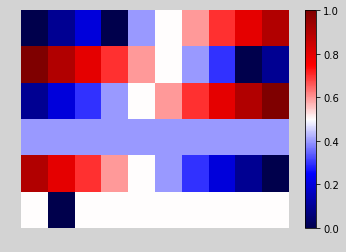

[0.6, 0.4, 0.7, 0.9, 0.4, 0.6, 0.4, 0.2, 0.5]

In [148]:
from random import uniform
# Goal: find k-different clusters

# centroid is computed by the jth value in the centroid is the mean
# of the jth values of all the member of the clusters

print("Applying the k-clustering...")


class k_means(MyEuclidean):
    '''
    Tried best to break this k-mean algorithm into various manageable subroutines w/o luck.
    The best I could come up with was creating functions that supports a particular function of the algorithm,
    but as of this date, I'm unfamiliar with the high-level design of this algorithm
    '''
    def __init__(self, k_value=2, MAX_ITERATIONS=30):
        self.k_value = k_value
        self.MAX_ITERATIONS = MAX_ITERATIONS
    
    def recalculate_centroid(self, cluster_points):
        '''
        This assumes cluster_points is an array containing only the cluster of a particular centroid
        '''
        return sum(cluster_points) / float(len(cluster_points))
    
    def init_centroid(self, data_set):
        ''' 
        Returns random starting values for the initial centroids
        '''
        return data_set[int(uniform(0,len(data_set)))][int(uniform(0,len(data_set)))]
    
    '''
    k_mean_stop() was taken from "K Means" by Chris Piech
    http://stanford.edu/~cpiech/cs221/handouts/kmeans.html
    '''
    def k_mean_stop(self, prev_centroid, centroid, iterations):
        if(iterations > self.MAX_ITERATIONS):
            return True
        return prev_centroid == centroid
    
    '''
    kmeans() was taken from "K Means" by Chris Piech
    http://stanford.edu/~cpiech/cs221/handouts/kmeans.html
    '''
    def kmeans(self, data_set, k_value):
        ''' 
        Compares distance between a point in the data set (x_i)
        against two centroids. Returns true if a data was appended
        '''
        # Each k clusters is paired with 1 centroid
        centroid = [None] * k_value
        
        # Initialize centroids randomly
        for i in range(len(centroid)):
            centroid[i] = self.init_centroid(data_set)
            #print(centroid[i])
        
        # Book keeping vars
        iterations = 0
        old_centroid = [None] * k_value
        clusters = [None] * k_value
        table_of_values = [None] * len(data_set)
        
        while (not self.k_mean_stop(old_centroid, centroid, iterations)):
            old_centroid[iterations] = centroid[iterations]
            iterations += 1
            
            #labels = getLabels(data_set, centroid)
            for i in range(len(data_set)):
                    for k in range(k_value):
                        for j in range(len(data_set)):
                            table_of_values[j] = self.euclidean(data_set[i][j], centroid[k])
            #print(table_of_values)
                        
            #centroid = recalculate_centroid(data_set, k)
        return centroid

test = DisplayGUI(data_set=panda_frame)
test.display_heatmap()
    
run = k_means()
run.kmeans(simple_example.panda_frame, k_value=9)

